In [2]:
!pip install seaborn


     -------------------------------------- 288.2/288.2 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 164.1/164.1 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [21]:
#Use the appropriate pandas methods to get the info on the data and describe it.
chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
#List the column names in the dataset.
sorted(chipotle_data)
# chipotle_data.columns



['choice_description', 'item_name', 'item_price', 'order_id', 'quantity']

In [16]:
#What is the most ordered item? How many exactly were ordered?
quant_data = chipotle_data[['quantity', 'item_name']].groupby('item_name').sum()
max_quant = quant_data['quantity'].max()
most_ordered_item =  quant_data[quant_data["quantity"] == max_quant]
most_ordered_item

# chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending = False).head(1)


C:\Users\hugox\AppData\Local\Temp\ipykernel_10192\1289893934.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending = False).head(1)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [6]:
# How much revenue did this chipotle make? 
# total_revenue  = chipotle_data["item_price"].sum()
# total_revenue
#about to iterate through item_price
chipotle_data['item_price'].str.replace( r"\$", "", regex = True).astype(float).sum()





34500.16

In [7]:
# How many orders were placed at this chipotle?
chipotle_data['quantity'].sum()


4972

In [8]:
# How many items cost most than $10?
items_more_than_10 = 0
prices = chipotle_data["item_price"]
prices = prices.str.replace(r"\$", "", regex = True).astype(float)

for price in prices:
    if price > 10:
        items_more_than_10 = items_more_than_10 + 1

items_more_than_10


1130

In [11]:
(chipotle_data['item_price'].str.replace( r"\$", "", regex = True).astype(float) > 10).sum()

1130

In [14]:
# List the name of all unique items in the dataset.
chipotle_data['item_name'].str.replace( "-", " ", regex = False).unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl',
       'Steak Bowl', 'Barbacoa Soft Tacos', 'Veggie Burrito',
       'Veggie Bowl', 'Steak Crispy Tacos',
       'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos',
       'Veggie Salad Bowl', 'Chips and Roasted Chili Corn Salsa',
       'Carnitas Soft Tacos', 'Chicken Salad', 'Canned Soft Drink',
       'Steak Salad Bowl', '6 Pack Soft Drink', 'Bowl', 'Burrito',
       'Crispy Tacos', 'Carnitas Crispy Tacos', 'Steak Salad',
       'Chips and Mild Fresh Tomato Salsa', 'Veggie Soft Tacos',
       'Carnitas Salad Bowl', 'Barbacoa Salad Bow

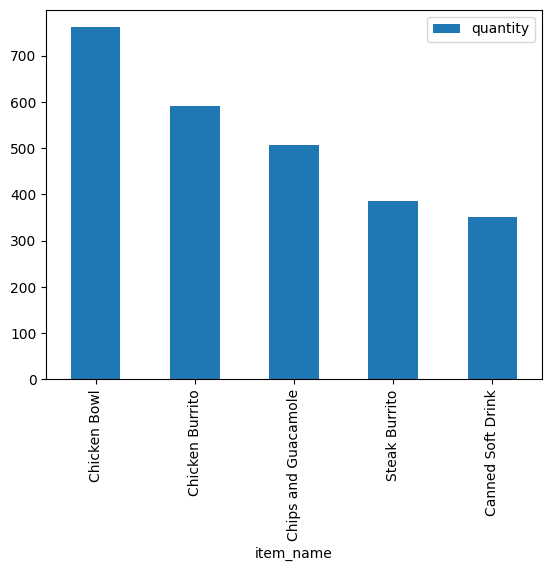

In [20]:
# Create a histogram of the top 5 items sold.
quant_data = chipotle_data[['quantity', 'item_name']].groupby('item_name').sum().sort_values(by ='quantity', ascending = False)
top_five = quant_data.head()
top_five.plot.bar()
plt.show()


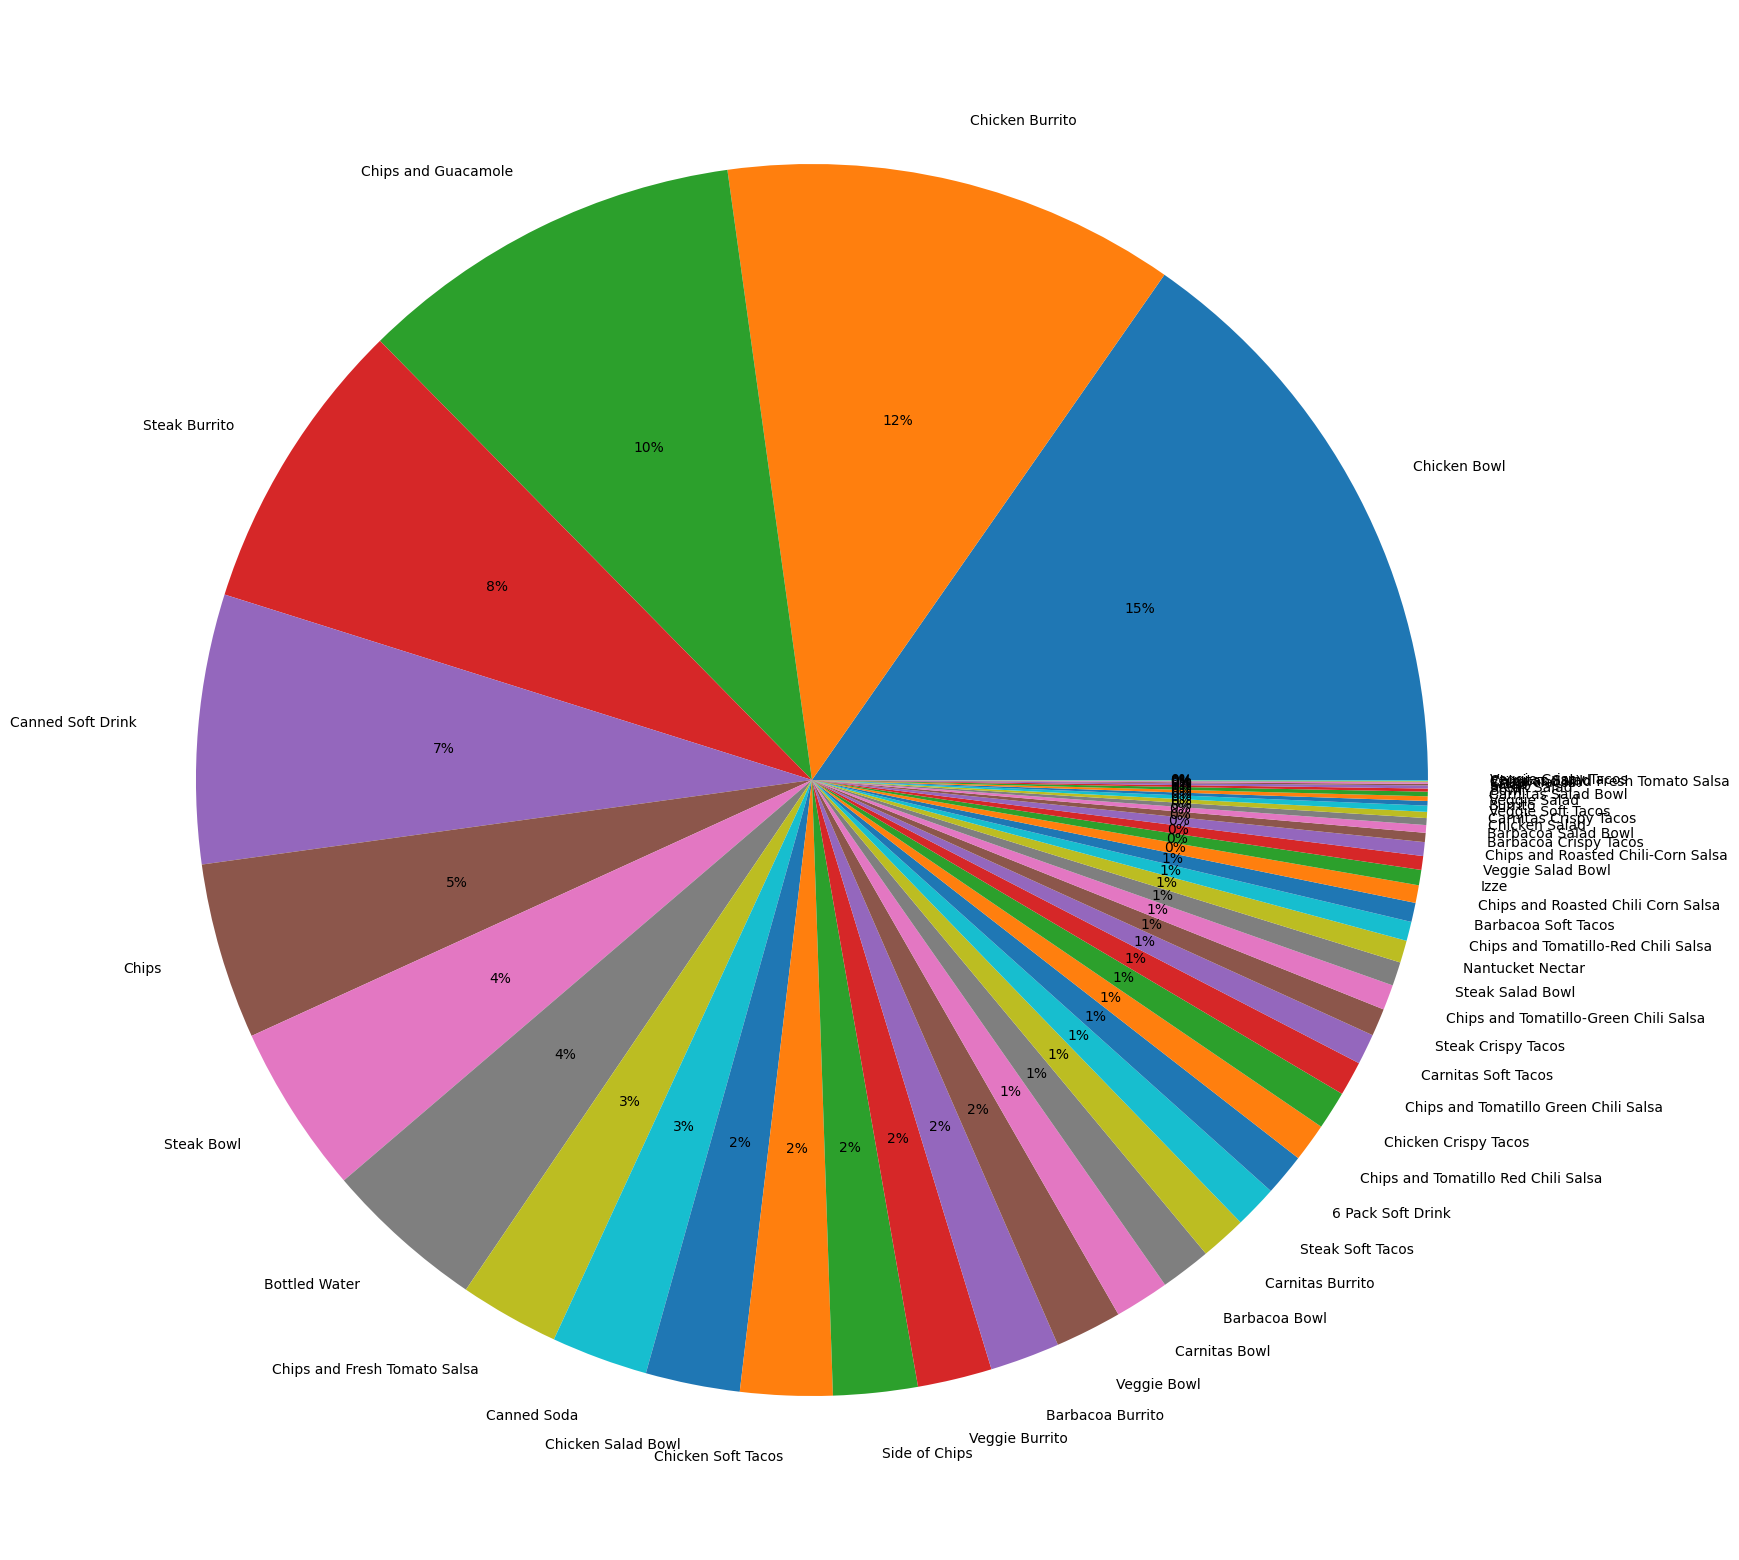

In [46]:
# Create a pie chart showing the number of times each item was order.
y = quant_data['quantity']
index = quant_data.index
plt.pie(y,labels = index,autopct="%.0f%%")
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()



In [28]:
index = quant_data.index
index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chips and Fresh Tomato Salsa', 'Canned Soda',
       'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Side of Chips',
       'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl',
       'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos',
       '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa',
       'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa',
       'Carnitas Soft Tacos', 'Steak Crispy Tacos',
       'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl',
       'Nantucket Nectar', 'Chips and Tomatillo-Red Chili Salsa',
       'Barbacoa Soft Tacos', 'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Carnitas Crispy Tacos', 'Veggie Soft Tac

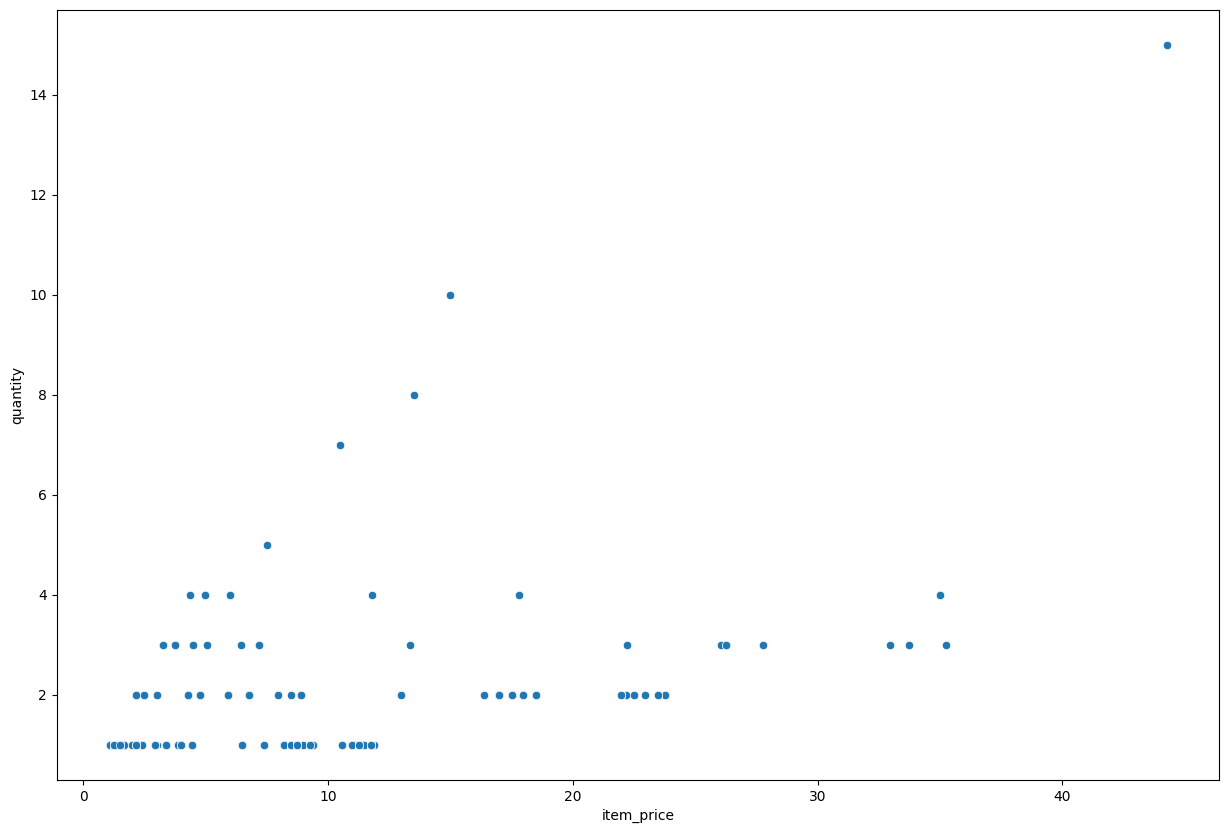

In [44]:
# Create a scatter plot showing how many items were order based on the price of the item.
x = chipotle_data['item_price'].str.replace( r"\$", "", regex = True).astype(float)
sns.scatterplot(data=chipotle_data, x=x, y="quantity")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

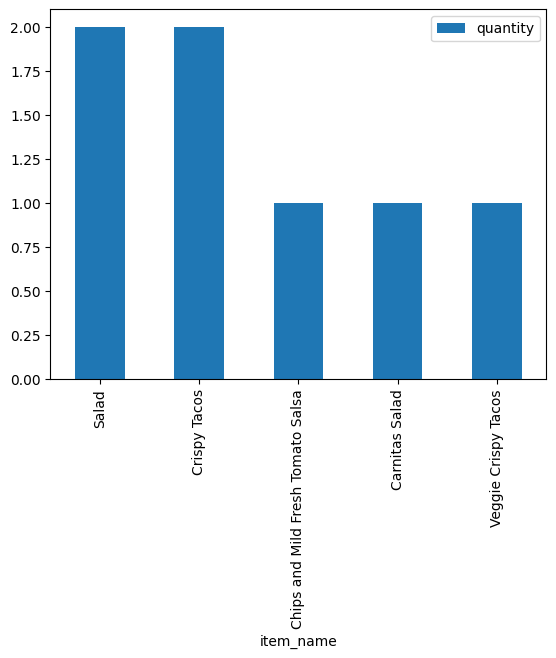

In [47]:
# Your team can come up with its own custom question to answer and visualize!
# What are the least sold items at chipotle?
quant_data = chipotle_data[['quantity', 'item_name']].groupby('item_name').sum().sort_values(by ='quantity', ascending = False)
bottom_five = quant_data.tail()
bottom_five.plot.bar()
plt.show()